In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
feature_data = open('/Users/yujia/Desktop/NWU/396_DS/Proj/features_update.csv')
df_feature = pd.read_csv(feature_data)
df_feature.head()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,45001,0.64250,5.216100,0.016667,0.000000,0.566667,0.0,0.566667,0.0,0.183333,0.0,0.300000,0.0
1,22001,0.65750,5.159126,0.250000,0.000000,0.666667,0.0,0.666667,0.0,0.250000,0.0,0.250000,0.0
2,51001,0.93125,1.366825,0.216667,0.000000,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0
3,16001,0.73300,7.916929,0.016667,0.000000,0.500000,0.0,0.716667,0.0,0.300000,0.0,0.300000,0.0
4,19001,0.69025,3.448276,0.000000,0.016393,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0


In [3]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fips                   3041 non-null   int64  
 1   mask rate              3041 non-null   float64
 2   ratio                  3041 non-null   float64
 3   stay at home 56        3041 non-null   float64
 4   stay at home 78        3041 non-null   float64
 5   >50 gatherings 56      3041 non-null   float64
 6   >50 gatherings 78      3041 non-null   float64
 7   >500 gatherings 56     3041 non-null   float64
 8   >500 gatherings 78     3041 non-null   float64
 9   restaurant dine-in 56  3041 non-null   float64
 10  restaurant dine-in 78  3041 non-null   float64
 11  entertainment/gym 56   3041 non-null   float64
 12  entertainment/gym 78   3041 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 309.0 KB


In [4]:
df_feature.describe()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,30348.783295,0.747597,7.008148,0.254576,0.034701,0.785295,0.606094,0.829617,0.673177,0.333180,0.107444,0.359098,0.133530
std,15232.455309,0.101978,22.966997,0.270988,0.176275,0.315685,0.487703,0.294181,0.468096,0.340795,0.308892,0.349751,0.338815
min,1001.000000,0.358250,1.016393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18157.000000,0.674000,2.470764,0.000000,0.000000,0.583333,0.000000,0.700000,0.000000,0.066667,0.000000,0.133333,0.000000
50%,29131.000000,0.749750,4.064643,0.216667,0.000000,1.000000,1.000000,1.000000,1.000000,0.183333,0.000000,0.250000,0.000000
75%,45085.000000,0.823750,7.102193,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.583333,0.000000,0.666667,0.000000
max,56045.000000,0.962250,1035.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb862358050>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb862380790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb862373090>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb862380bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb862382710>,
 'means': []}

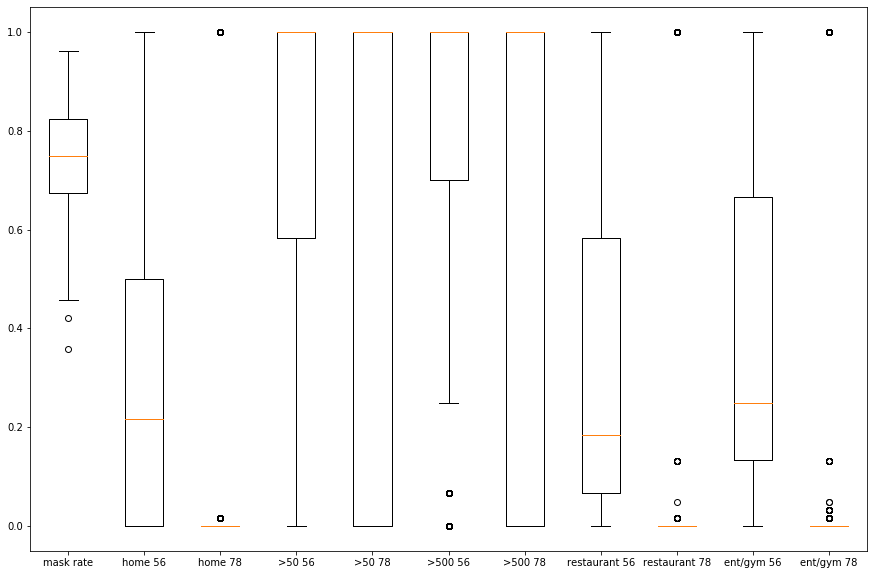

In [5]:
labels = 'mask rate', 'home 56', 'home 78', '>50 56', '>50 78', '>500 56', '>500 78', 'restaurant 56', 'restaurant 78', 'ent/gym 56', 'ent/gym 78'
plt.subplots(figsize = (15, 10))
plt.boxplot([df_feature['mask rate'], df_feature['stay at home 56'], df_feature['stay at home 78'], 
             df_feature['>50 gatherings 56'], df_feature['>50 gatherings 78'], df_feature['>500 gatherings 56'], 
             df_feature['>500 gatherings 78'], df_feature['restaurant dine-in 56'], df_feature['restaurant dine-in 78'], 
             df_feature['entertainment/gym 56'], df_feature['entertainment/gym 78']], labels = labels)

# Regression

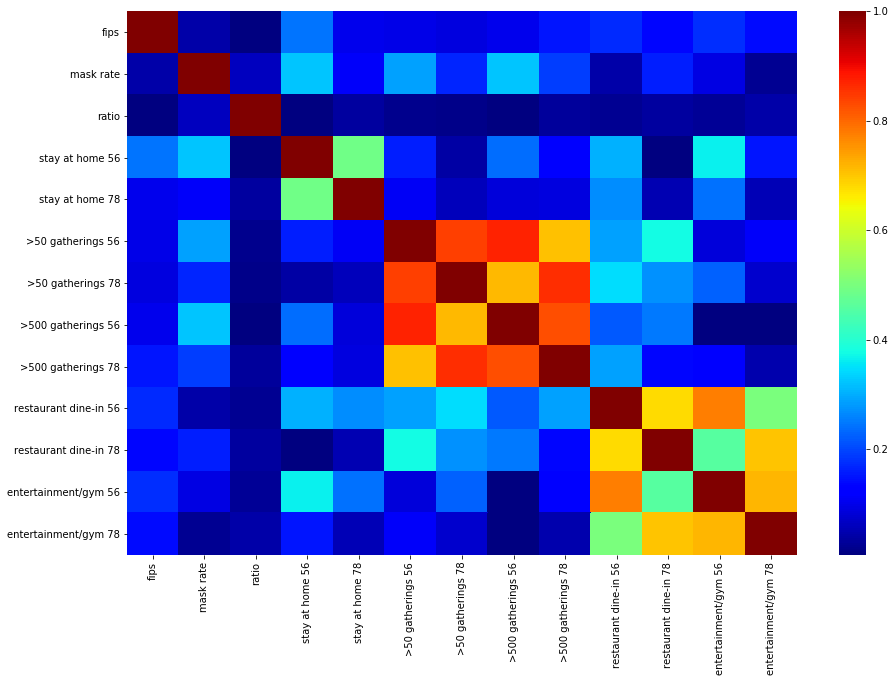

In [6]:
corr_matrix = df_feature.corr().abs()
plt.subplots(figsize = (15, 10))
sns.heatmap(corr_matrix, cmap = 'jet')

In [7]:
feature_filtered = df_feature[df_feature['ratio'] <= 120]  # 3034 rows × 13 columns
feature_filtered.head()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,45001,0.64250,5.216100,0.016667,0.000000,0.566667,0.0,0.566667,0.0,0.183333,0.0,0.300000,0.0
1,22001,0.65750,5.159126,0.250000,0.000000,0.666667,0.0,0.666667,0.0,0.250000,0.0,0.250000,0.0
2,51001,0.93125,1.366825,0.216667,0.000000,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0
3,16001,0.73300,7.916929,0.016667,0.000000,0.500000,0.0,0.716667,0.0,0.300000,0.0,0.300000,0.0
4,19001,0.69025,3.448276,0.000000,0.016393,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0


In [8]:
skew_thresh = 0.5
skewed = feature_filtered.skew().sort_values(ascending = False)
a = skewed[abs(skewed) > skew_thresh]
a

ratio                    5.806962
stay at home 78          5.284138
restaurant dine-in 78    2.539471
entertainment/gym 78     2.162481
restaurant dine-in 56    0.954259
stay at home 56          0.936932
entertainment/gym 56     0.836015
>500 gatherings 78      -0.740506
>50 gatherings 56       -1.201609
>500 gatherings 56      -1.623674
dtype: float64

In [9]:
skewed_cols = skewed[abs(skewed) > skew_thresh].index.tolist()
feature_log = feature_filtered.copy()
feature_log[skewed_cols] = feature_filtered[skewed_cols].apply(np.log1p)
feature_log.head()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,45001,0.64250,1.827143,0.016529,0.000000,0.448950,0.0,0.448950,0.000000,0.168335,0.0,0.262364,0.0
1,22001,0.65750,1.817935,0.223144,0.000000,0.510826,0.0,0.510826,0.000000,0.223144,0.0,0.223144,0.0
2,51001,0.93125,0.861549,0.196115,0.000000,0.693147,1.0,0.693147,0.693147,0.168335,0.0,0.168335,0.0
3,16001,0.73300,2.187952,0.016529,0.000000,0.405465,0.0,0.540384,0.000000,0.262364,0.0,0.262364,0.0
4,19001,0.69025,1.492517,0.000000,0.016261,0.693147,1.0,0.693147,0.693147,0.168335,0.0,0.168335,0.0


In [10]:
feature_log = (feature_log - feature_log.mean()) / (feature_log.max() - feature_log.min())
feature_log.head()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,0.265809,-0.174114,0.027236,-0.272784,-0.035850,-0.161645,-0.607163,-0.200611,-0.674816,-0.129804,-0.107909,-0.020641,-0.134241
1,-0.152038,-0.149279,0.024925,0.025297,-0.035850,-0.072378,-0.607163,-0.111343,-0.674816,-0.050732,-0.107909,-0.077225,-0.134241
2,0.374813,0.303949,-0.215184,-0.013697,-0.035850,0.190657,0.392837,0.151691,0.325184,-0.129804,-0.107909,-0.156296,-0.134241
3,-0.261042,-0.024279,0.117821,-0.272784,-0.035850,-0.224381,-0.607163,-0.068699,-0.674816,0.005851,-0.107909,-0.020641,-0.134241
4,-0.206540,-0.095057,-0.056774,-0.296631,-0.012391,0.190657,0.392837,0.151691,0.325184,-0.129804,-0.107909,-0.156296,-0.134241


In [11]:
feature_log.describe()

,fips,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
count,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03,3.034000e+03
mean,6.623282e-18,1.260271e-15,1.479261e-16,9.657550e-16,-2.126328e-16,3.653867e-14,-1.649819e-15,3.847903e-14,3.238499e-14,5.405513e-15,-8.796889e-17,9.231647e-15,-6.035511e-17
std,2.767655e-01,1.689614e-01,1.598918e-01,2.927163e-01,1.763772e-01,2.947398e-01,4.874675e-01,2.762278e-01,4.670981e-01,3.406558e-01,3.092045e-01,3.476147e-01,3.390711e-01
min,-5.335512e-01,-6.447264e-01,-2.554135e-01,-2.966311e-01,-3.584959e-02,-8.093432e-01,-6.071625e-01,-8.483088e-01,-6.748156e-01,-3.726603e-01,-1.079092e-01,-3.991526e-01,-1.342412e-01
25%,-2.217552e-01,-1.218580e-01,-1.196953e-01,-2.966311e-01,-3.584959e-02,-1.463782e-01,-6.071625e-01,-8.277409e-02,-6.748156e-01,-2.795508e-01,-1.079092e-01,-2.185803e-01,-1.342412e-01
50%,-2.241466e-02,3.659410e-03,-2.447264e-02,-1.369715e-02,-3.584959e-02,1.906568e-01,3.928375e-01,1.516912e-01,3.251844e-01,-1.298037e-01,-1.079092e-01,-7.722450e-02,-1.342412e-01
75%,2.673626e-01,1.259690e-01,9.236340e-02,2.883314e-01,-3.584959e-02,1.906568e-01,3.928375e-01,1.516912e-01,3.251844e-01,3.458052e-01,-1.079092e-01,3.378130e-01,-1.342412e-01
max,4.664488e-01,3.552736e-01,7.445865e-01,7.033689e-01,9.641504e-01,1.906568e-01,3.928375e-01,1.516912e-01,3.251844e-01,6.273397e-01,8.920908e-01,6.008474e-01,8.657588e-01


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb8626f6d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb86270b490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb8626f6d10>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb86270bed0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb8626f6bd0>,
 'means': []}

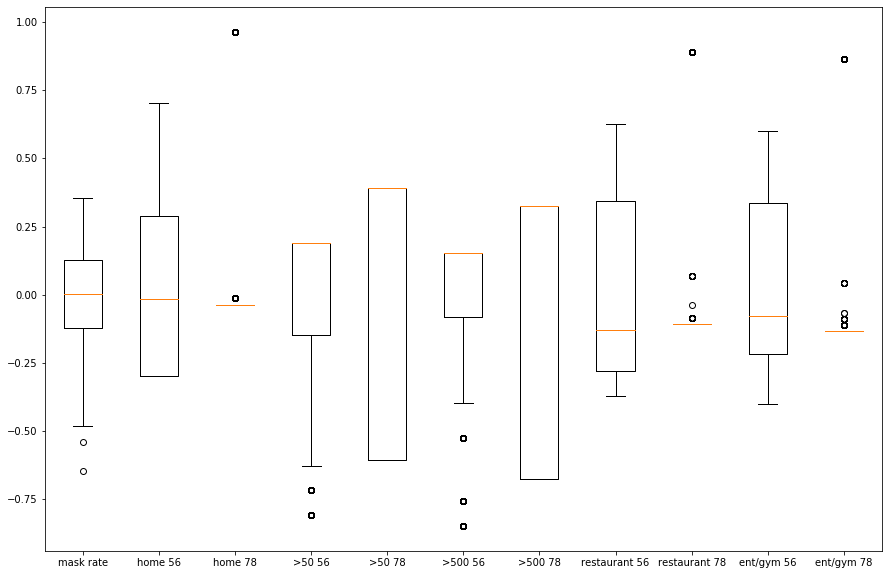

In [12]:
labels = 'mask rate', 'home 56', 'home 78', '>50 56', '>50 78', '>500 56', '>500 78', 'restaurant 56', 'restaurant 78', 'ent/gym 56', 'ent/gym 78'
plt.subplots(figsize = (15, 10))
plt.boxplot([feature_log['mask rate'], feature_log['stay at home 56'], feature_log['stay at home 78'], 
             feature_log['>50 gatherings 56'], feature_log['>50 gatherings 78'], feature_log['>500 gatherings 56'], 
             feature_log['>500 gatherings 78'], feature_log['restaurant dine-in 56'], feature_log['restaurant dine-in 78'], 
             feature_log['entertainment/gym 56'], feature_log['entertainment/gym 78']], labels = labels)

In [13]:
y_reg = feature_log.ratio.values

In [14]:
features = feature_log.drop(['fips', 'ratio'],axis=1)
features.head()

,mask rate,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,-0.174114,-0.272784,-0.035850,-0.161645,-0.607163,-0.200611,-0.674816,-0.129804,-0.107909,-0.020641,-0.134241
1,-0.149279,0.025297,-0.035850,-0.072378,-0.607163,-0.111343,-0.674816,-0.050732,-0.107909,-0.077225,-0.134241
2,0.303949,-0.013697,-0.035850,0.190657,0.392837,0.151691,0.325184,-0.129804,-0.107909,-0.156296,-0.134241
3,-0.024279,-0.272784,-0.035850,-0.224381,-0.607163,-0.068699,-0.674816,0.005851,-0.107909,-0.020641,-0.134241
4,-0.095057,-0.296631,-0.012391,0.190657,0.392837,0.151691,0.325184,-0.129804,-0.107909,-0.156296,-0.134241


In [15]:
# X_train, X_test, y_train, y_test = train_test_split(feature_filtered.drop(['fips', 'ratio'],axis=1), feature_filtered.ratio.values, test_size = 0.4)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, y_reg, test_size = 0.4)

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [18]:
def ApplyRegression(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_tr = model.predict(X_train)
    print('train r2 score:' + str(r2_score(y_train, y_pred_tr)))
    print('train rmse score:' + str(mean_squared_error(y_train, y_pred_tr)))
    
    y_pred_te = model.predict(X_test)
    print('test r2 score:' + str(r2_score(y_test, y_pred_te)))
    print('test rmse score:' + str(mean_squared_error(y_test, y_pred_te)))

In [19]:
print('LinearRegression')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
ApplyRegression(model, X_train, X_test, y_train, y_test)

LinearRegression
train r2 score:0.12707030231041538
train rmse score:0.02237946347605016
test r2 score:0.132989030361105
test rmse score:0.02205236750188935


In [20]:
print('RidgeCV')
from sklearn.linear_model import RidgeCV
model = RidgeCV(alphas = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10])
ApplyRegression(model, X_train, X_test, y_train, y_test)

RidgeCV
train r2 score:0.12701606457239945
train rmse score:0.022380853979180212
test r2 score:0.1328510352413781
test rmse score:0.022055877398765224


In [21]:
print('ElasticNetCV')
from sklearn.linear_model import ElasticNetCV
model = ElasticNetCV(alphas = [0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio = [0.01, 0.1, 0.5, 0.9, 0.99], max_iter = 5000)
ApplyRegression(model, X_train, X_test, y_train, y_test)

ElasticNetCV
train r2 score:0.12689665909669867
train rmse score:0.0223839151999055
test r2 score:0.1326896567032091
test rmse score:0.022059982051365064


In [22]:
print('RandomForestRegressor')
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
ApplyRegression(model, X_train, X_test, y_train, y_test)

RandomForestRegressor
train r2 score:0.855744107043316
train rmse score:0.0036983155644420805
test r2 score:0.14227525423249232
test rmse score:0.021816173002987056


In [23]:
print('GradientBoostingRegressor')
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
ApplyRegression(model, X_train, X_test, y_train, y_test)

GradientBoostingRegressor
train r2 score:0.40372532817719264
train rmse score:0.015286806343135291
test r2 score:0.28765786475771227
test rmse score:0.018118375780165882


In [24]:
print('SVM')
from sklearn.svm import SVR
print('\n')
print('linear kernel')
model = SVR(kernel='linear')
ApplyRegression(model, X_train, X_test, y_train, y_test)
print('\n')
print('poly kernel')
model = SVR(kernel='poly')
ApplyRegression(model, X_train, X_test, y_train, y_test)
print('\n')
print('rbf kernel')
model = SVR(kernel='rbf')
ApplyRegression(model, X_train, X_test, y_train, y_test)

SVM


linear kernel
train r2 score:0.11768800794917833
train rmse score:0.02261999912804435
test r2 score:0.1243739221021749
test rmse score:0.022271492218931415


poly kernel
train r2 score:0.26206818820020006
train rmse score:0.01891849718677086
test r2 score:0.22905735489766665
test rmse score:0.01960887592893568


rbf kernel
train r2 score:0.27947412371042335
train rmse score:0.018472257931709972
test r2 score:0.2376106726715812
test rmse score:0.019391322848852546


In [25]:
print('KNeighborsRegressor')
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(weights="uniform")
ApplyRegression(model, X_train, X_test, y_train, y_test)

KNeighborsRegressor
train r2 score:0.46749908675173346
train rmse score:0.013651826453544113
test r2 score:0.25480807055180155
test rmse score:0.0189539081546777


In [26]:
print('DecisionTreeRegressor')
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
ApplyRegression(model, X_train, X_test, y_train, y_test)

DecisionTreeRegressor
train r2 score:0.968979154401176
train rmse score:0.0007952872756105305
test r2 score:-0.25060306000247734
test rmse score:0.03180900731815239


# Classification

In [27]:
fts = df_feature.to_dict('dict')
for i in fts['ratio']:
    if fts['ratio'][i] > 5:
        fts['ratio'][i] = 1
    else:
        fts['ratio'][i] = 0
features_clf = pd.DataFrame(fts)
features_clf.rename(columns={'ratio':'surge'}, inplace = True)
features_clf.head()

,fips,mask rate,surge,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,45001,0.64250,1,0.016667,0.000000,0.566667,0.0,0.566667,0.0,0.183333,0.0,0.300000,0.0
1,22001,0.65750,1,0.250000,0.000000,0.666667,0.0,0.666667,0.0,0.250000,0.0,0.250000,0.0
2,51001,0.93125,0,0.216667,0.000000,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0
3,16001,0.73300,1,0.016667,0.000000,0.500000,0.0,0.716667,0.0,0.300000,0.0,0.300000,0.0
4,19001,0.69025,0,0.000000,0.016393,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0


In [28]:
features_clf.describe()

,fips,mask rate,surge,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,30348.783295,0.747597,0.395594,0.254576,0.034701,0.785295,0.606094,0.829617,0.673177,0.333180,0.107444,0.359098,0.133530
std,15232.455309,0.101978,0.489058,0.270988,0.176275,0.315685,0.487703,0.294181,0.468096,0.340795,0.308892,0.349751,0.338815
min,1001.000000,0.358250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18157.000000,0.674000,0.000000,0.000000,0.000000,0.583333,0.000000,0.700000,0.000000,0.066667,0.000000,0.133333,0.000000
50%,29131.000000,0.749750,0.000000,0.216667,0.000000,1.000000,1.000000,1.000000,1.000000,0.183333,0.000000,0.250000,0.000000
75%,45085.000000,0.823750,1.000000,0.500000,0.000000,1.000000,1.000000,1.000000,1.000000,0.583333,0.000000,0.666667,0.000000
max,56045.000000,0.962250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
y_clf = features_clf.surge.values

In [30]:
fts_clf = features_clf.drop(['fips', 'surge'],axis=1)
fts_clf.head()

,mask rate,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,>500 gatherings 56,>500 gatherings 78,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78
0,0.64250,0.016667,0.000000,0.566667,0.0,0.566667,0.0,0.183333,0.0,0.300000,0.0
1,0.65750,0.250000,0.000000,0.666667,0.0,0.666667,0.0,0.250000,0.0,0.250000,0.0
2,0.93125,0.216667,0.000000,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0
3,0.73300,0.016667,0.000000,0.500000,0.0,0.716667,0.0,0.300000,0.0,0.300000,0.0
4,0.69025,0.000000,0.016393,1.000000,1.0,1.000000,1.0,0.183333,0.0,0.183333,0.0


In [31]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(fts_clf, y_clf, test_size = 0.3)

In [32]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1.0, penalty = 'l1', tol = 1e-6, solver='liblinear')
lr_model.fit(X_train_clf, y_train_clf)
y_lr = lr_model.predict(X_test_clf)
#y_lr

In [33]:
lr_model.score(X_test_clf, y_test_clf)

0.6374589266155531

In [34]:
from sklearn.metrics import f1_score
f1_score(y_test_clf, y_lr, labels=None, pos_label=1, average='binary', sample_weight=None)

0.42233856893542754

In [35]:
# KNN
from sklearn import neighbors
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_clf, y_train_clf)
y_knn = knn_model.predict(X_test_clf)
#y_knn

In [36]:
knn_model.score(X_test_clf, y_test_clf)

0.6615553121577218

In [37]:
f1_score(y_test_clf, y_knn, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5617021276595745

In [38]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=8)
dt_model.fit(X_train_clf, y_train_clf)
y_dt = dt_model.predict(X_test_clf)
#y_dt

In [39]:
dt_model.score(X_test_clf, y_test_clf)

0.6549835706462213

In [40]:
f1_score(y_test_clf, y_dt, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5827814569536425

In [41]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_clf, y_train_clf)
y_rfc = rfc_model.predict(X_test_clf)
#y_rfc

In [42]:
rfc_model.score(X_test_clf, y_test_clf)

0.6210295728368017

In [43]:
f1_score(y_test_clf, y_rfc, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5140449438202247

In [44]:
# SVM
from sklearn.svm import SVC
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train_clf, y_train_clf)
y_svm = svm_model.predict(X_test_clf)
#y_svm

In [45]:
svm_model.score(X_test_clf, y_test_clf)

0.6746987951807228

In [46]:
f1_score(y_test_clf, y_svm, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5041736227045075

In [47]:
# model ensemble
y_en = []
for i in range(len(y_test_clf)):
    y_en.append(stats.mode([y_lr[i], y_knn[i], y_dt[i], y_rfc[i], y_svm[i]])[0][0])

In [48]:
mis_clf = 0
for i in range(len(y_test_clf)):
    if y_test_clf[i] != y_en[i]:
        mis_clf += 1
accuracy = 1 - (mis_clf / len(y_en))
print('Accuracy:', accuracy)

Accuracy: 0.6812705366922234


In [49]:
f1_score(y_test_clf, y_en, labels=None, pos_label=1, average='binary', sample_weight=None)

0.5417322834645669

### After Cluster

In [1]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./final_data.csv')

In [3]:
data.head(3)

,Unnamed: 0,fips,county,cases_sum_56,mask rate,ratio,stay at home 56,stay at home 78,>50 gatherings 56,>50 gatherings 78,...,restaurant dine-in 56,restaurant dine-in 78,entertainment/gym 56,entertainment/gym 78,public schools 56,public schools 78,federal guidelines 56,federal guidelines 78,foreign travel ban 56,foreign travel ban 78
0,0,45001,Abbeville,3267,0.64250,5.216100,0,0,1,0,...,0,0,0,0,1,1,1,1,1,1
1,1,22001,Acadia,25571,0.65750,5.159126,0,0,1,0,...,0,0,0,0,1,1,1,1,1,1
2,2,51001,Accomack,49157,0.93125,1.366825,0,0,1,1,...,0,0,0,0,1,1,1,1,1,1


In [4]:
data.columns

Index(['Unnamed: 0', 'fips', 'county', 'cases_sum_56', 'mask rate', 'ratio',
       'stay at home 56', 'stay at home 78', '>50 gatherings 56',
       '>50 gatherings 78', '>500 gatherings 56', '>500 gatherings 78',
       'restaurant dine-in 56', 'restaurant dine-in 78',
       'entertainment/gym 56', 'entertainment/gym 78', 'public schools 56',
       'public schools 78', 'federal guidelines 56', 'federal guidelines 78',
       'foreign travel ban 56', 'foreign travel ban 78'],
      dtype='object')

In [5]:
mask_use = data[['fips','county','mask rate','ratio']]
feature_56 = data[['county','stay at home 56','>50 gatherings 56','>500 gatherings 56','restaurant dine-in 56','entertainment/gym 56']]

In [6]:
feature_56 = feature_56.set_index('county')
feature_56 = pd.DataFrame(feature_56)

In [7]:
feature_56.shape

(2934, 5)

In [8]:
maxClusters = 5
sse = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(feature_56)
    sse.append(kmeans.inertia_)

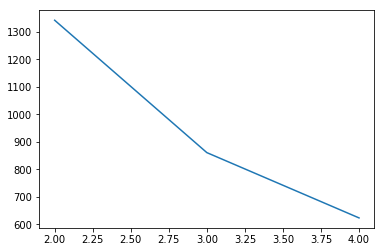

In [9]:
plt.plot(range(2,maxClusters),sse)

In [13]:
t= preprocessing.StandardScaler().fit(feature_56)
cluster_df=t.transform(feature_56)

In [14]:
res = KMeans(random_state=0,n_clusters=3).fit(feature_56)

In [15]:
feature_56['lable'] = res.labels_

In [16]:
feature_56.head(3)

,stay at home 56,>50 gatherings 56,>500 gatherings 56,restaurant dine-in 56,entertainment/gym 56,lable
county,,,,,,
Abbeville,0,1,1,0,0,0
Acadia,0,1,1,0,0,0
Accomack,0,1,1,0,0,0


In [17]:
mask = mask_use[['county','mask rate','ratio']]
mask = mask.set_index('county')

In [18]:
maxClusters = 5
sse1 = []
for nClusters in range(2,maxClusters):
    kmeans = KMeans(n_clusters=nClusters, random_state=0).fit(mask)
    sse1.append(kmeans.inertia_)

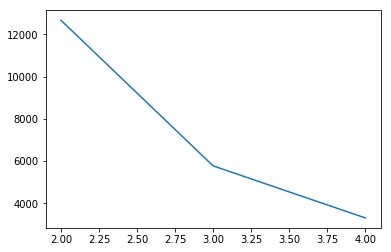

In [19]:
plt.plot(range(2,maxClusters),sse1)

In [20]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(mask)

In [21]:
mask['lable'] = kmeans.labels_

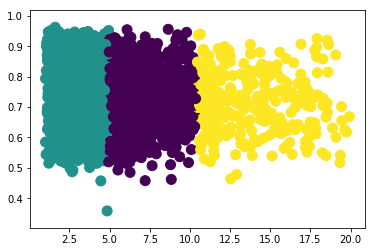

In [22]:
color = mask['lable']
plt.scatter(mask['ratio'],mask['mask rate'],c=color ,s = 100)

In [23]:
mask_0 = mask[mask['lable']==0]
mask_1 = mask[mask['lable']==1]
mask_2 = mask[mask['lable']==2]

In [24]:
mask_0.describe()

,mask rate,ratio,lable
count,828.000000,828.000000,828.0
mean,0.732896,7.068811,0.0
std,0.097156,1.472472,0.0
min,0.457750,4.945885,0.0
25%,0.663812,5.821742,0.0
50%,0.731875,6.824046,0.0
75%,0.805312,8.178193,0.0
max,0.955500,10.408163,0.0


In [25]:
mask_1.describe()

,mask rate,ratio,lable
count,1824.000000,1824.000000,1824.0
mean,0.760780,2.839360,1.0
std,0.101151,1.057339,0.0
min,0.358250,1.016393,1.0
25%,0.688437,1.902954,1.0
50%,0.762125,2.760826,1.0
75%,0.839250,3.718449,1.0
max,0.962250,4.941236,1.0


In [26]:
mask_2.describe()

,mask rate,ratio,lable
count,282.000000,282.000000,282.0
mean,0.715940,13.874779,2.0
std,0.100254,2.609150,0.0
min,0.464000,10.467211,2.0
25%,0.640687,11.446876,2.0
50%,0.713625,13.513250,2.0
75%,0.790312,15.978179,2.0
max,0.939250,19.923810,2.0


In [30]:
feature_56 = feature_56.reset_index(['county'])
mask = mask.reset_index(['county'])

In [31]:
mask.rename(columns={'lable':'lablem','county':'county1'},inplace=True)

In [32]:
final =pd.concat([mask,feature_56],axis=1)

In [33]:
final

,county1,mask rate,ratio,lablem,county,stay at home 56,>50 gatherings 56,>500 gatherings 56,restaurant dine-in 56,entertainment/gym 56,lable
0,Abbeville,0.64250,5.216100,0,Abbeville,0,1,1,0,0,0
1,Acadia,0.65750,5.159126,0,Acadia,0,1,1,0,0,0
2,Accomack,0.93125,1.366825,1,Accomack,0,1,1,0,0,0
3,Ada,0.73300,7.916929,0,Ada,0,0,1,0,0,0
4,Adair,0.69025,3.448276,1,Adair,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2929,Yuma,0.92700,5.350487,0,Yuma,0,1,1,1,1,1
2930,Yuma,0.61875,1.951415,1,Yuma,0,1,1,0,0,0
2931,Zapata,0.90025,9.765317,0,Zapata,1,1,1,0,0,0
2932,Zavala,0.81475,18.591125,2,Zavala,1,1,1,0,0,0


In [34]:
lvl=final[['county','lablem','lable']]

In [35]:
final.shape

(2934, 11)

In [36]:
lvl['lvl'] = ' '

/root/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
lvl

,county,lablem,lable,lvl
0,Abbeville,0,0,
1,Acadia,0,0,
2,Accomack,1,0,
3,Ada,0,0,
4,Adair,1,0,
...,...,...,...,...
2929,Yuma,0,1,
2930,Yuma,1,0,
2931,Zapata,0,0,
2932,Zavala,2,0,


In [38]:
for i in range(len(lvl)):
    if lvl.iloc[i,1] == 1:
        if lvl.iloc[i,2] == 1:
            lvl.iloc[i,3] = 1
        if lvl.iloc[i,2] == 2:
            lvl.iloc[i,3] = 3
        if lvl.iloc[i,2] == 0:
            lvl.iloc[i,3] = 2
    if lvl.iloc[i,1] == 0:
        if lvl.iloc[i,2] == 1:
            lvl.iloc[i,3] = 2
        if lvl.iloc[i,2] == 2:
            lvl.iloc[i,3] = 4
        if lvl.iloc[i,2] == 0:
            lvl.iloc[i,3] = 3
    if lvl.iloc[i,1] == 2:
        if lvl.iloc[i,2] == 1:
            lvl.iloc[i,3] = 3
        if lvl.iloc[i,2] == 2:
            lvl.iloc[i,3] = 5
        if lvl.iloc[i,2] == 0:
            lvl.iloc[i,3] = 4

/root/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [39]:
lvl = lvl['lvl']

In [40]:
final1 =pd.concat([final,lvl],axis=1)

In [41]:
final1 = final1.drop(['county1','lablem','lable'],axis=1)

In [42]:
final1['lvl'].value_counts()

2    1332
3     936
1     344
4     289
5      33
Name: lvl, dtype: int64

In [ ]:
final1['lvl'].hist()

##### Random Forest

In [44]:
X = final1[['mask rate','ratio','stay at home 56','>50 gatherings 56','>500 gatherings 56','restaurant dine-in 56','entertainment/gym 56']]
y = lvl.astype('int')

In [45]:
import sklearn.ensemble as se
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

In [46]:
RF = se.RandomForestClassifier(max_depth=10, n_estimators=333, min_samples_split=2)

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.85)

In [48]:
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=333)

In [49]:
pred_test_y = RF.predict(x_test)

In [50]:
print('score：', sm.r2_score(y_test, pred_test_y))

score： 0.9721693017731748


##### Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [57]:
x_trainnb, x_testnb, y_trainnb, y_testnb = train_test_split(X, y, test_size=0.9)

In [58]:
clf= GaussianNB()

In [59]:
clf.fit(x_trainnb,y_trainnb)

GaussianNB()

In [60]:
pred_tesy_NB_y = clf.predict(x_testnb)

In [61]:
print('score：', sm.r2_score(y_testnb, pred_tesy_NB_y))

score： 0.17733891272822289


In [62]:
bnl = BernoulliNB()

In [63]:
bnl.fit(x_trainnb,y_trainnb)

BernoulliNB()

In [64]:
pred_tesy_bnl_y = bnl.predict(x_testnb)

In [65]:
print('score：', sm.r2_score(y_testnb, pred_tesy_bnl_y))

score： 0.1340141342783462
